This notebook continues from the matrix factorisation algorithm analysis. Continue from
analysis on ml-100k, here the larger 1m dataset is used to generate accuracy and time scores. As well as top n prediction lists for each algorithm

In [9]:
import pandas as pd
import numpy as np
import random
from surprise import Dataset, SVDpp, SVD, NMF
from surprise.accuracy import rmse
import time
from surprise.model_selection import train_test_split

In [10]:
svd_setup= pd.read_csv('./gridSearch/SVD_rmse_best.csv')
svd_n_factors=svd_setup['n_factors'][0]
svd_lr_all= svd_setup['lr_all'][0]
svd_reg_all= svd_setup['reg_all'][0]
svd_n_epochs=svd_setup['n_epochs'][0]

In [11]:
data= Dataset.load_builtin('ml-1m')
trainset, testset = train_test_split(data, test_size=0.25)

In [12]:
algo= SVD(n_factors=svd_n_factors, lr_all=svd_lr_all, reg_all=svd_reg_all, n_epochs=svd_n_epochs, random_state=1)
start_fit = time.time()
algo.fit(trainset)
svd_fit_1m= time.time()-start_fit
start_predict= time.time()
predictions_svd = algo.test(testset)
svd_test_1m= time.time()-start_predict
print("Unbiased accuracy on 100k=,", end=" ")
svd_rmse_1m= rmse(predictions_svd)
print("Fit time for 100k = "+ str(svd_fit_1m))
print("Test time for 100k ="+ str(svd_test_1m))

svd_1m_stats=np.array([svd_rmse_1m, svd_fit_1m, svd_test_1m])

Unbiased accuracy on 100k=, RMSE: 0.8680
Fit time for 100k = 31.543119430541992
Test time for 100k =2.7326157093048096


In [13]:
#load the setup for SVDpp
svdpp_setup= pd.read_csv('./gridSearch/SVDpp_rmse_best.csv')

svdpp_n_factors=svd_setup['n_factors'][0]
svdpp_lr_all= svd_setup['lr_all'][0]
svdpp_reg_all= svd_setup['reg_all'][0]
svdpp_n_epochs=svd_setup['n_epochs'][0]

In [14]:
algo= SVDpp(n_factors=svdpp_n_factors, lr_all=svdpp_lr_all, reg_all=svdpp_reg_all, n_epochs=svdpp_n_epochs, random_state=1)
start_fit = time.time()
algo.fit(trainset)
svdpp_fit_1m= time.time()-start_fit
start_predict= time.time()
predictions_svdpp = algo.test(testset)
svdpp_test_1m= time.time()-start_predict
print("Unbiased accuracy on 1m=,", end=" ")
svdpp_rmse_1m= rmse(predictions_svdpp)
print("Fit time for 1m = "+ str(svdpp_fit_1m))
print("Test time for 1m ="+ str(svdpp_test_1m))


Unbiased accuracy on 1m=, RMSE: 0.8660
Fit time for 1m = 12664.303590774536
Test time for 1m =100.64086389541626


In [15]:
svdpp_1m_stats=np.array([svdpp_rmse_1m, svdpp_fit_1m, svdpp_test_1m])
svdpp_1m_stats

array([8.65960423e-01, 1.26643036e+04, 1.00640864e+02])

In [16]:
nmf_setup= pd.read_csv('./gridSearch/nmf_rmse_best.csv')
nmf_n_factors =nmf_setup['n_factors'].iloc[0]
nmf_lr_bu =nmf_setup['lr_bu'].iloc[0]
nmf_lr_bi =nmf_setup['lr_bi'].iloc[0]
nmf_reg_bu =nmf_setup['reg_bu'].iloc[0]
nmf_reg_bi =nmf_setup['reg_bi'].iloc[0]
nmf_n_epochs =nmf_setup['n_epochs'].iloc[0]
nmf_biased =nmf_setup['biased'].iloc[0]

In [17]:
algo= NMF(n_factors=nmf_n_factors,
                     lr_bu=nmf_lr_bu,
                     lr_bi=nmf_lr_bi,
                     reg_bu=nmf_reg_bu,
                     reg_bi=nmf_reg_bi,
                     n_epochs=nmf_n_epochs,
                     biased=nmf_biased, random_state=1)


start_fit = time.time()
algo.fit(trainset)
nmfb_fit_1m= time.time()-start_fit
start_predict= time.time()
predictions_nmfb = algo.test(testset)
nmfb_test_1m= time.time()-start_predict
print("Unbiased accuracy on 1m=,", end=" ")
nmfb_rmse_1m= rmse(predictions_nmfb)
print("Fit time for 1m = "+ str(nmfb_fit_1m))
print("Test time for 1m ="+ str(nmfb_test_1m))

nmfb_1m_stats=np.array([nmfb_rmse_1m, nmfb_fit_1m, nmfb_test_1m])

Unbiased accuracy on 1m=, RMSE: 0.9511
Fit time for 1m = 21.720911979675293
Test time for 1m =2.408543825149536


In [18]:
algo= NMF(n_factors=nmf_n_factors,
                     lr_bu=nmf_lr_bu,
                     lr_bi=nmf_lr_bi,
                     reg_bu=nmf_reg_bu,
                     reg_bi=nmf_reg_bi,
                     n_epochs=nmf_n_epochs,
                     biased=False, random_state=1)


start_fit = time.time()
algo.fit(trainset)
nmf_fit_1m= time.time()-start_fit
start_predict= time.time()
predictions_nmf = algo.test(testset)
nmf_test_1m= time.time()-start_predict
print("Unbiased accuracy on 1m=,", end=" ")
nmf_rmse_1m= rmse(predictions_nmf)
print("Fit time for 1m = "+ str(nmf_fit_1m))
print("Test time for 1m ="+ str(nmf_test_1m))

nmf_1m_stats=np.array([nmf_rmse_1m, nmf_fit_1m, nmf_test_1m])

Unbiased accuracy on 1m=, RMSE: 0.9056
Fit time for 1m = 21.515865325927734
Test time for 1m =2.2374966144561768


In [19]:
data=pd.DataFrame(columns=['RMSE', 'Fit Time', 'Predict Time'])
data.loc[len(data)] = svd_1m_stats
data.loc[len(data)] = svdpp_1m_stats
data.loc[len(data)] = nmfb_1m_stats
data.loc[len(data)] = nmf_1m_stats
data.insert(0,'Algorithm', ['SVD', 'SVDpp', 'NMF(bias)', 'NMF(unbias)'])
data.to_csv('./algo_data/matrix_factor_1m', index=False)

In [20]:
rmse_values=np.array([svd_1m_stats[0], svdpp_1m_stats[0], nmf_1m_stats[0], nmfb_1m_stats[0]])
fit_times=np.array([svd_1m_stats[1], svdpp_1m_stats[1], nmf_1m_stats[1], nmfb_1m_stats[1]])
algos=np.array(['SVD', 'SVD++', 'NMF(unbiased)', 'NMF(biased)'])

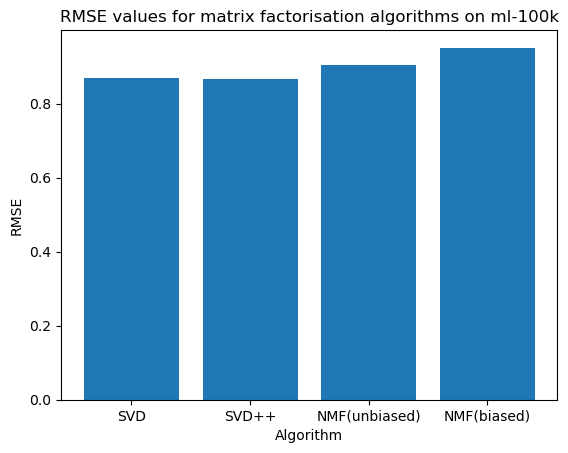

In [21]:
import matplotlib.pyplot as plt
x_labels = ['SVD', 'SVD++', 'NMF(unbiased)', 'NMF(bias)']

# Create the bar chart
plt.bar(range(len(rmse_values)), rmse_values)

# Set the x-axis tick locations and labels
plt.xticks(range(len(algos)), algos)

# Set the title and labels for the chart
plt.title('RMSE values for matrix factorisation algorithms on ml-100k')
plt.xlabel('Algorithm')
plt.ylabel('RMSE')

# Display the chart
plt.savefig('./Matrix Graphs/rmse_1m.png')
plt.show()

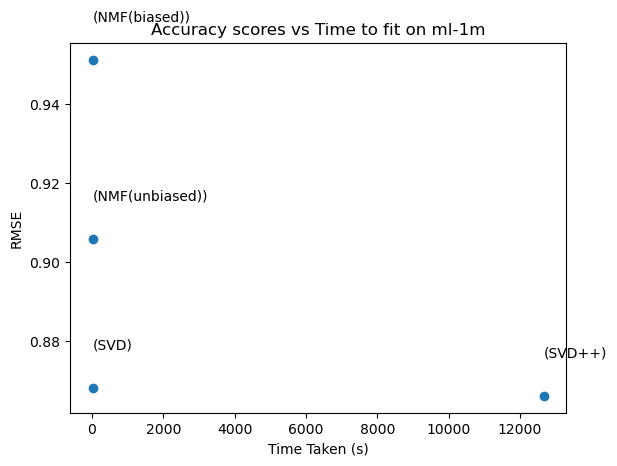

In [22]:

# Create the scatter plot
plt.scatter(fit_times, rmse_values)

# Add labels to each point
for i in range(len(fit_times)):
    plt.text(fit_times[i]+1, rmse_values[i]+0.01, f"({algos[i]})")

# Set the title and labels for the chart
plt.title('Accuracy scores vs Time to fit on ml-1m')
plt.xlabel('Time Taken (s)')
plt.ylabel('RMSE')


# Display the chart
plt.savefig('./Matrix Graphs/Accuracy vs time to fit on ml1m')
plt.show()

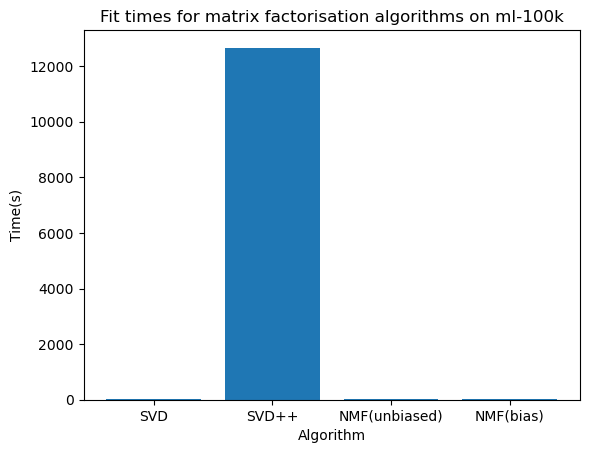

In [23]:
# Create the bar chart
plt.bar(range(len(fit_times)), fit_times)

# Set the x-axis tick locations and labels
plt.xticks(range(len(x_labels)), x_labels)

# Set the title and labels for the chart
plt.title('Fit times for matrix factorisation algorithms on ml-100k')
plt.xlabel('Algorithm')
plt.ylabel('Time(s)')

# Display the chart
plt.savefig('./Matrix Graphs/fit_1m.png')
plt.show()

In [39]:
# create prediction lists
from own_algorithms.top_n_list import get_top_n_list

movies_cols = ['movie_id', 'title', 'genres']
movies_df = pd.read_csv('./ml-1m/movies.dat', sep='::', names=movies_cols, engine='python', encoding='latin-1')

# create top n list for SVD
movies398=get_top_n_list(predictions_svd, 10, '398', movies_df)
movies1=get_top_n_list(predictions_svd, 10, '1', movies_df)
movies134=get_top_n_list(predictions_svd, 10, '134', movies_df)


In [40]:
#load all 3 prediction csv
user1= pd.read_csv('./predictions/1.csv')
user134= pd.read_csv('./predictions/134.csv')
user398= pd.read_csv('./predictions/398.csv')

In [41]:
user1['SVD']= movies1
user1

,Hybrid,KNN Basic,KNN Baseline,SVD
0,Fargo (1996),Fargo (1996),Star Wars: Episode IV - A New Hope (1977),Toy Story (1995)
1,Gigi (1958),Gigi (1958),Schindler's List (1993),"Secret Garden, The (1993)"
2,Cinderella (1950),Cinderella (1950),My Fair Lady (1964),Mary Poppins (1964)
3,One Flew Over the Cuckoo's Nest (1975),One Flew Over the Cuckoo's Nest (1975),"Wizard of Oz, The (1939)",E.T. the Extra-Terrestrial (1982)
4,Ben-Hur (1959),Ben-Hur (1959),Driving Miss Daisy (1989),One Flew Over the Cuckoo's Nest (1975)
5,Saving Private Ryan (1998),Saving Private Ryan (1998),Saving Private Ryan (1998),Saving Private Ryan (1998)
6,"Christmas Story, A (1983)","Christmas Story, A (1983)",Miracle on 34th Street (1947),Run Lola Run (Lola rennt) (1998)
7,Ferris Bueller's Day Off (1986),Ferris Bueller's Day Off (1986),Run Lola Run (Lola rennt) (1998),"Sixth Sense, The (1999)"
8,Awakenings (1990),Awakenings (1990),"Sixth Sense, The (1999)",Awakenings (1990)
9,Toy Story 2 (1999),Toy Story 2 (1999),"Christmas Story, A (1983)","Girl, Interrupted (1999)"


In [42]:
user134['SVD']= movies134
user134

,Hybrid,KNN Basic,KNN Baseline,SVD
0,Braveheart (1995),Braveheart (1995),Rumble in the Bronx (1995),Toy Story (1995)
1,In the Line of Fire (1993),In the Line of Fire (1993),In the Line of Fire (1993),Braveheart (1995)
2,"Last of the Mohicans, The (1992)","Last of the Mohicans, The (1992)",Rudy (1993),Forrest Gump (1994)
3,Austin Powers: International Man of Mystery (1...,Austin Powers: International Man of Mystery (1...,Grosse Pointe Blank (1997),Aladdin (1992)
4,"Full Monty, The (1997)","Full Monty, The (1997)",Contact (1997),Sneakers (1992)
5,"Mask of Zorro, The (1998)",Office Space (1999),Saving Private Ryan (1998),Saving Private Ryan (1998)
6,Being John Malkovich (1999),Being John Malkovich (1999),My Cousin Vinny (1992),Airplane! (1980)
7,Toy Story 2 (1999),Toy Story 2 (1999),Enemy of the State (1998),American Beauty (1999)
8,Chicken Run (2000),Chicken Run (2000),Office Space (1999),Being John Malkovich (1999)
9,Almost Famous (2000),Almost Famous (2000),High Fidelity (2000),Remember the Titans (2000)


In [43]:
user398['SVD']= movies398
user398

,Hybrid,KNN Basic,KNN Baseline,SVD
0,Taxi Driver (1976),Taxi Driver (1976),Taxi Driver (1976),Twelve Monkeys (1995)
1,"Godfather, The (1972)","Godfather, The (1972)","Professional, The (a.k.a. Leon: The Profession...",Blade Runner (1982)
2,"Clockwork Orange, A (1971)",Dial M for Murder (1954),Blade Runner (1982),Annie Hall (1977)
3,Full Metal Jacket (1987),"Clockwork Orange, A (1971)",Fargo (1996),"Sting, The (1973)"
4,Chinatown (1974),Chinatown (1974),2001: A Space Odyssey (1968),Stand by Me (1986)
5,"Manchurian Candidate, The (1962)","Manchurian Candidate, The (1962)",Raiders of the Lost Ark (1981),L.A. Confidential (1997)
6,This Is Spinal Tap (1984),This Is Spinal Tap (1984),Chinatown (1974),Run Lola Run (Lola rennt) (1998)
7,Roger & Me (1989),Run Lola Run (Lola rennt) (1998),Raising Arizona (1987),American Beauty (1999)
8,Rushmore (1998),"Sixth Sense, The (1999)",L.A. Confidential (1997),Wonder Boys (2000)
9,Run Lola Run (Lola rennt) (1998),Dog Day Afternoon (1975),Say Anything... (1989),Best in Show (2000)


In [44]:
# create top n list for SVDpp
movies398=get_top_n_list(predictions_svdpp, 10, '398', movies_df)
movies1=get_top_n_list(predictions_svdpp, 10, '1', movies_df)
movies134=get_top_n_list(predictions_svdpp, 10, '134', movies_df)
movies398

['Twelve Monkeys (1995)',
 'Blade Runner (1982)',
 'Annie Hall (1977)',
 'Sting, The (1973)',
 'Stand by Me (1986)',
 'L.A. Confidential (1997)',
 'Saving Private Ryan (1998)',
 'Run Lola Run (Lola rennt) (1998)',
 'American Beauty (1999)',
 'Wonder Boys (2000)']

In [45]:
user1['SVD++']= movies1
user1

,Hybrid,KNN Basic,KNN Baseline,SVD,SVD++
0,Fargo (1996),Fargo (1996),Star Wars: Episode IV - A New Hope (1977),Toy Story (1995),Toy Story (1995)
1,Gigi (1958),Gigi (1958),Schindler's List (1993),"Secret Garden, The (1993)","Secret Garden, The (1993)"
2,Cinderella (1950),Cinderella (1950),My Fair Lady (1964),Mary Poppins (1964),Mary Poppins (1964)
3,One Flew Over the Cuckoo's Nest (1975),One Flew Over the Cuckoo's Nest (1975),"Wizard of Oz, The (1939)",E.T. the Extra-Terrestrial (1982),E.T. the Extra-Terrestrial (1982)
4,Ben-Hur (1959),Ben-Hur (1959),Driving Miss Daisy (1989),One Flew Over the Cuckoo's Nest (1975),One Flew Over the Cuckoo's Nest (1975)
5,Saving Private Ryan (1998),Saving Private Ryan (1998),Saving Private Ryan (1998),Saving Private Ryan (1998),Saving Private Ryan (1998)
6,"Christmas Story, A (1983)","Christmas Story, A (1983)",Miracle on 34th Street (1947),Run Lola Run (Lola rennt) (1998),Run Lola Run (Lola rennt) (1998)
7,Ferris Bueller's Day Off (1986),Ferris Bueller's Day Off (1986),Run Lola Run (Lola rennt) (1998),"Sixth Sense, The (1999)","Sixth Sense, The (1999)"
8,Awakenings (1990),Awakenings (1990),"Sixth Sense, The (1999)",Awakenings (1990),Awakenings (1990)
9,Toy Story 2 (1999),Toy Story 2 (1999),"Christmas Story, A (1983)","Girl, Interrupted (1999)","Girl, Interrupted (1999)"


In [46]:
user134['SVD++']= movies134
user134

,Hybrid,KNN Basic,KNN Baseline,SVD,SVD++
0,Braveheart (1995),Braveheart (1995),Rumble in the Bronx (1995),Toy Story (1995),Toy Story (1995)
1,In the Line of Fire (1993),In the Line of Fire (1993),In the Line of Fire (1993),Braveheart (1995),Braveheart (1995)
2,"Last of the Mohicans, The (1992)","Last of the Mohicans, The (1992)",Rudy (1993),Forrest Gump (1994),Forrest Gump (1994)
3,Austin Powers: International Man of Mystery (1...,Austin Powers: International Man of Mystery (1...,Grosse Pointe Blank (1997),Aladdin (1992),Aladdin (1992)
4,"Full Monty, The (1997)","Full Monty, The (1997)",Contact (1997),Sneakers (1992),Sneakers (1992)
5,"Mask of Zorro, The (1998)",Office Space (1999),Saving Private Ryan (1998),Saving Private Ryan (1998),Saving Private Ryan (1998)
6,Being John Malkovich (1999),Being John Malkovich (1999),My Cousin Vinny (1992),Airplane! (1980),American Beauty (1999)
7,Toy Story 2 (1999),Toy Story 2 (1999),Enemy of the State (1998),American Beauty (1999),Being John Malkovich (1999)
8,Chicken Run (2000),Chicken Run (2000),Office Space (1999),Being John Malkovich (1999),Patriot Games (1992)
9,Almost Famous (2000),Almost Famous (2000),High Fidelity (2000),Remember the Titans (2000),Remember the Titans (2000)


In [47]:
user398['SVD++']= movies398
user398

,Hybrid,KNN Basic,KNN Baseline,SVD,SVD++
0,Taxi Driver (1976),Taxi Driver (1976),Taxi Driver (1976),Twelve Monkeys (1995),Twelve Monkeys (1995)
1,"Godfather, The (1972)","Godfather, The (1972)","Professional, The (a.k.a. Leon: The Profession...",Blade Runner (1982),Blade Runner (1982)
2,"Clockwork Orange, A (1971)",Dial M for Murder (1954),Blade Runner (1982),Annie Hall (1977),Annie Hall (1977)
3,Full Metal Jacket (1987),"Clockwork Orange, A (1971)",Fargo (1996),"Sting, The (1973)","Sting, The (1973)"
4,Chinatown (1974),Chinatown (1974),2001: A Space Odyssey (1968),Stand by Me (1986),Stand by Me (1986)
5,"Manchurian Candidate, The (1962)","Manchurian Candidate, The (1962)",Raiders of the Lost Ark (1981),L.A. Confidential (1997),L.A. Confidential (1997)
6,This Is Spinal Tap (1984),This Is Spinal Tap (1984),Chinatown (1974),Run Lola Run (Lola rennt) (1998),Saving Private Ryan (1998)
7,Roger & Me (1989),Run Lola Run (Lola rennt) (1998),Raising Arizona (1987),American Beauty (1999),Run Lola Run (Lola rennt) (1998)
8,Rushmore (1998),"Sixth Sense, The (1999)",L.A. Confidential (1997),Wonder Boys (2000),American Beauty (1999)
9,Run Lola Run (Lola rennt) (1998),Dog Day Afternoon (1975),Say Anything... (1989),Best in Show (2000),Wonder Boys (2000)


In [48]:
movies398=get_top_n_list(predictions_nmfb, 10, '398', movies_df)
movies1=get_top_n_list(predictions_nmfb, 10, '1', movies_df)
movies134=get_top_n_list(predictions_nmfb, 10, '134', movies_df)
movies398

['Forrest Gump (1994)',
 'Blade Runner (1982)',
 'Bananas (1971)',
 'Annie Hall (1977)',
 'Sting, The (1973)',
 'Stand by Me (1986)',
 'Butch Cassidy and the Sundance Kid (1969)',
 'Saving Private Ryan (1998)',
 'Run Lola Run (Lola rennt) (1998)',
 'American Beauty (1999)']

In [49]:
user1['NMF (Bias)']= movies1
user134['NMF (Bias)']= movies134
user398['NMF (Bias)']= movies398

In [50]:
movies398=get_top_n_list(predictions_nmf, 10, '398', movies_df)
movies1=get_top_n_list(predictions_nmf, 10, '1', movies_df)
movies134=get_top_n_list(predictions_nmf, 10, '134', movies_df)
user1['NMF (Unbias)']= movies1
user134['NMF (Unbias)']= movies134
user398['NMF (Unbias)']= movies398

In [51]:
user398

,Hybrid,KNN Basic,KNN Baseline,SVD,SVD++,NMF (Bias),NMF (Unbias)
0,Taxi Driver (1976),Taxi Driver (1976),Taxi Driver (1976),Twelve Monkeys (1995),Twelve Monkeys (1995),Forrest Gump (1994),Blade Runner (1982)
1,"Godfather, The (1972)","Godfather, The (1972)","Professional, The (a.k.a. Leon: The Profession...",Blade Runner (1982),Blade Runner (1982),Blade Runner (1982),"Sting, The (1973)"
2,"Clockwork Orange, A (1971)",Dial M for Murder (1954),Blade Runner (1982),Annie Hall (1977),Annie Hall (1977),Bananas (1971),Heathers (1989)
3,Full Metal Jacket (1987),"Clockwork Orange, A (1971)",Fargo (1996),"Sting, The (1973)","Sting, The (1973)",Annie Hall (1977),Butch Cassidy and the Sundance Kid (1969)
4,Chinatown (1974),Chinatown (1974),2001: A Space Odyssey (1968),Stand by Me (1986),Stand by Me (1986),"Sting, The (1973)",L.A. Confidential (1997)
5,"Manchurian Candidate, The (1962)","Manchurian Candidate, The (1962)",Raiders of the Lost Ark (1981),L.A. Confidential (1997),L.A. Confidential (1997),Stand by Me (1986),Saving Private Ryan (1998)
6,This Is Spinal Tap (1984),This Is Spinal Tap (1984),Chinatown (1974),Run Lola Run (Lola rennt) (1998),Saving Private Ryan (1998),Butch Cassidy and the Sundance Kid (1969),Run Lola Run (Lola rennt) (1998)
7,Roger & Me (1989),Run Lola Run (Lola rennt) (1998),Raising Arizona (1987),American Beauty (1999),Run Lola Run (Lola rennt) (1998),Saving Private Ryan (1998),American Beauty (1999)
8,Rushmore (1998),"Sixth Sense, The (1999)",L.A. Confidential (1997),Wonder Boys (2000),American Beauty (1999),Run Lola Run (Lola rennt) (1998),Wonder Boys (2000)
9,Run Lola Run (Lola rennt) (1998),Dog Day Afternoon (1975),Say Anything... (1989),Best in Show (2000),Wonder Boys (2000),American Beauty (1999),Animal House (1978)


In [53]:
# rewrite the prediction lists to file
user134.to_csv('./predictions/134.csv', index=False)
user1.to_csv('./predictions/1.csv', index=False)
user398.to_csv('./predictions/398.csv', index=False)